<a href="https://colab.research.google.com/github/kimanuul/python_lectures/blob/main/day0630_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "머신러닝"
date: '2022-06-30'
---

## 파이썬 주요 라이브러리
- Machine Learning
  + 정형데이터 
  + 사이킷런 (Scikit-Learn)
- Deep Learning
  + 비정형데이터
  + Tensorflow(구글) vs Pytorch(페이스북)
  + 혼공머 : Tensorflow 
  + 실제 상용서비스 - Tensorflow vs R&D - Pytorch

## 생선분류 
- p.45
- 도미, 곤들매기, 농어, 등등 
- 이 생선들을 프로그램으로 분류한다. 

- 30cm 도미라고 알려줘라

In [1]:
fish_length = 31
if fish_length >= 30:
    print("도미")

도미


- p.47
- 도미데이터

## 데이터 수집

In [2]:
# 도미의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

## 데이터 가공
- 여기서는 생략

## 데이터 시각화
- 여러 인사이트 확인 위해 시각화, 통계 수치 계산
- 탐색적 자료 분석(EDA : Exploratory Data Analysis)
- 얘는 참고만 한다. 

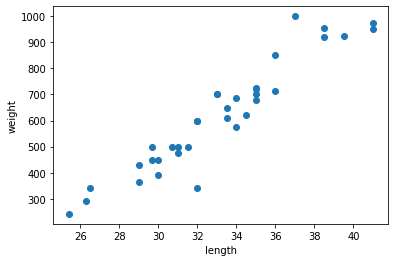

In [3]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 파이썬 시각화는 객체지향으로 한다. 
- 이유 : 좀 더 이쁘고, 아름답게 다듬으려면... 
- 캐글 시각화, 참고할 때, 아래와 같이 하는 분들이 많음

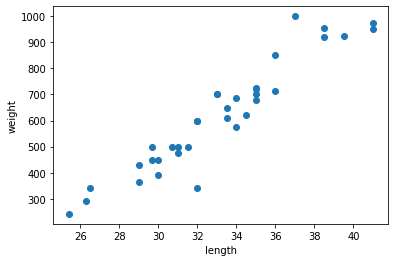

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 빙어 데이터 준비하기

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- 시각화 
- p.50 시각화

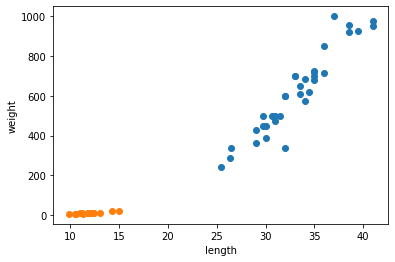

In [6]:
fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.scatter(smelt_length, smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 두개의 리스트 합치기

In [7]:
length = bream_length + smelt_length 
weight = bream_weight + smelt_weight 

- 2차원 리스트로 만든다. 

In [8]:
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data[0:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

- 라벨링을 해준다 = 지도 해준다 = 지도학습

In [9]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 모델링

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# 클래스 인스턴스화
kn = KNeighborsClassifier()

# 모형 학습
#       독립변수, 종속변수
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [11]:
# 예측 정확도
kn.score(fish_data, fish_target)

1.0

- 실제 예측을 해보자
- 새로운 물고기 도착했습니다. 
  + 길이 : 30, 몸무게 : 600

In [ ]:
ac_length = int(input("물고기 길이를 입력하세요..."))
ac_weight = int(input("물고기 무게를 입력하세요..."))

preds = int(kn.predict([[ac_length, ac_weight]]))
print(preds)

if preds == 1:
  print("도미")
else:
  print("빙어")


## 새로운 모델 제안
- Default : 정확도 100%
- 제안 : 정확도 71%

---> 실험 단계


In [ ]:
def add(a = 1, b = 0):
  return a + b 
add()

- 하이퍼 파라미터 세팅
  + n_neighbors = 49

- default : 100%


## 머신러닝 알고리즘 두개의 흐름
- 선형 모델 : 선형회귀, 로지스틱 회귀,서포트 벡터 머신
- 의사결정트리 모델 : 1975년 의사결정트리 모델, KNN, 
  + 랜덤포레스트
  + 부스팅계열 : LightGBM(2017), XGBoost(2016)

- 선형회귀, 로지스틱회귀, 랜덤포레스트, LightGBM(=XGBoost)

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

## 훈련 세트와 테스트 세트


In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- 2차원 파이썬 리스트 
- 라벨링

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14
print(fish_target[0:40:5])
print(fish_data[0:40:5])

- Sample 
- 도미 35마리, 빙어 14마리
- 49개의 샘플 존재
- 처음 35개를 훈련 / 나머지 14개를 테스트

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 클래스 인스턴스화
kn = KNeighborsClassifier()

# 훈련 세트로 0:34 인덱스 활용
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스 세트로 35:마지막 인덱스 활용
test_input = fish_data[35:]
test_target = fish_target[35:]

# 모형 학습
kn = kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

- 샘플링 편향
- 훈련 세트와 테스트 세트가 골고루 섞이지 않음

## 샘플링 작업

In [ ]:
import numpy as np 

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr[0:49:7])
print(input_arr.shape, target_arr.shape) 

In [ ]:
# random으로 무작위 배열을 만들거나 설정... 
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

In [ ]:
print(index)

- 교재 77p 

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

## 시각화 

In [ ]:
train_input[:1]

In [ ]:
train_input[:, 0]  # 길이 리스트


In [ ]:
import matplotlib.pyplot as plt  
fig, ax = plt.subplots()
ax.scatter(train_input[:, 0], train_input[:, 1])
ax.scatter(test_input[:, 0], test_input[:, 1])
ax.set_xlabel("length")
ax.set_ylabel("weight")
plt.show()

## 두번째 머신러닝 프로그램

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

In [ ]:
kn.predict(test_input) # 예측 데이터

In [ ]:
test_target # 실제 데이터

## 데이터 전처리
- 머신러닝 시, 데이터 전처리
- 결측치 처리, 이상치 처리 

### 데이터 불러오기 

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# column_stack() 활용
np.column_stack(([1, 2, 3], [4, 5, 6]))

- 독립변수

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

- 종속변수 = Y = 타깃 데이터 = Target

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

### scikit-learn 훈련세트와 테스트 세트 나누기  

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    # 독립변수, 종속변수
    fish_data, fish_target, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

- p.92 도미와 빙어가 잘 섞여 있냐? 

In [ ]:
print(test_target)

- 35(도미) :14 (빙어)
  + 2.5 : 1 
- 테스트 셋 (비율) 
  + 3.3 : 1 


## 층화샘플링
- 기초 통계, 설문조사
- 비율
- 여론조사
  + 남성 속옷을 구매하는 비율 (남자 9, 여자 1) 
  + 신제품 (남자 5, 여자 5)
  

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    # 독립변수, 종속변수
    fish_data, fish_target, stratify=fish_target, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

In [ ]:
print(test_target)

- 테스트 세트의 비율이 2.25:1 


## 수상한 도미 한 마리
- 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target) 
kn.score(test_input, test_target) 

- 도미 사이즈 20cm 이상 = 1
- 빙어 사이즈 10cm 이하 = 0

In [ ]:
print(kn.predict([[25, 150]]))

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(train_input[: , 0], train_input[: , 1])
ax.scatter(25, 150, marker = '^')
plt.show()

- 알고리즘 문제
- 

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- p,98
- 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다름
- 두 특성의 스케일이 다름
  + 스케일이 같도록 통계 처리 필요
  + Feature Engineering (피처 엔지니어링)
- 머신러닝
  + 전체 데이터 전처리 (결측치 처리, 이상치 처리)
  + 데이터 분리
  + Featuere Engineering

### 표준점수
- z 점수

In [ ]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

- 표준 점수 구하기

In [ ]:
# 브로드 캐스팅 -> 서로 다른 배열을 계산할 때
print(train_input.shape, mean.shape, std.shape)
train_scaled = (train_input - mean) / std

In [ ]:
train_input[0:5]

In [ ]:
train_scaled[0:5]

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

통계처리 전 : KNN -> 예측이 틀림
통계처리 후 : KNN -> 예측이 정확하게 맞음
-- 통계처리 --> Feature Engineering

- 모형학

In [ ]:
kn.fit(train_scaled, train_target)

In [ ]:
# kn.score(test_input, test_target) -> 스케일 안 됐기 때문에 사용x
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

- 예측

In [ ]:
print(kn.predict([new]))

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()